<a href="https://colab.research.google.com/github/Du-nara/ME421-Mechanical-Systems-Lab-A3/blob/main/Vibration/E_20_388_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week #1**

### **Activity #1**

The TecQuipment vibration analyser consists of:



* A rigid beam of length L
* Left end: pinned support (no vertical translation, free rotation)
* Right end: connected to the frame through a linear spring of stiffness k
* An unbalanced motor mounted at the mid-span of the beam
* Small-amplitude vibrations about the static equilibrium position


The beam is assumed to be:

* Rigid
* Of mass $\ m_b $
* With mass moment of inertia $I_b$ about its center of mass

The motor has:
* Mass $m_m$
* Produces a harmonic excitation force due to imbalance

To capture the first two dominant modes, we select:
1. $q_1$​(t)=θ(t)  : Small rotation of the rigid beam about the pinned end
2. $q_2$​(t)=y(t)  : Vertical displacement of the motor at mid-span

These two coordinates represent:

* A global rotational mode

* A local translational mode due to the motor inertia

Thus, the system is modeled as a 2-DOF system.
	​

For small angular motion:
* Vertical displacement at the right end:  
$y_R$​=Lθ	​
* Vertical displacement at the motor location (mid-span):
$y_M$​=$\frac{L}{2}$ ​θ+y

(a) Beam kinetic energy

The beam undergoes pure rotation about the pinned end:
$ T_b = \frac{1}{2} I_O \dot{\theta}^2 $

Using parallel-axis theorem:
$I_O = I_b + m_b \left(\frac{L}{2}\right)^2$

(b) Motor kinetic energy

The motor undergoes vertical translation:

$T_m = \frac{1}{2}\, m_m \left( \dot{y}_M \right)^2$

$\dot{y}_M = \frac{L}{2}\,\dot{\theta} + \dot{y}$

$T_m = \frac{1}{2}\, m_m \left( \frac{L}{2}\,\dot{\theta} + \dot{y} \right)^2$

(c) Total kinetic energy

$T = T_b + T_m$

Potential Energy of the System;

Only the spring stores potential energy.

Spring extension at the right end:
δ=Lθ

Spring potential energy:
$V = \frac{1}{2}\,k\,(L\theta)^2$

Lagrange’s Equations;

Using generalized coordinates

$q_1 = \theta, \qquad q_2 = y$

$\frac{d}{dt}\!\left( \frac{\partial T}{\partial \dot{q}_i} \right)
- \frac{\partial T}{\partial q_i}
+ \frac{\partial V}{\partial q_i}
= Q_i$


The unbalanced motor produces a harmonic force:

$F(t) = m_e e \,\omega^{2}\sin(\omega t)$

This force acts vertically at the motor location, contributing only to y:

$Q_{\theta} = 0$

$Q_{y} = F(t)$

After applying Lagrange’s equations:

$\begin{bmatrix} M_{11} & M_{12} \\ M_{21} & M_{22} \end{bmatrix} \begin{bmatrix} \ddot{\theta} \\ \ddot{y} \end{bmatrix} + \begin{bmatrix} K_{11} & 0 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} \theta \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ F(t) \end{bmatrix}$

Where:

$M_{11} = I_{0} + m_m (\frac{L}{2})^{2}$

$M_{12} = M_{21} = m_m(\frac{L}{2})$

$M_{22}​=m_m​$

$K_{11}=kL^2$

This 2-DOF model captures the first two dominant vibration modes of the TecQuipment vibration analyser.


## **Activity #2**

From Activity #1, the 2-DOF system is described by:

$
\mathbf{M}
=
\begin{bmatrix}
I_{0} + m_m \left(\dfrac{L}{2}\right)^{2} & m_m \left(\dfrac{L}{2}\right) \\
m_m \left(\dfrac{L}{2}\right) & m_m
\end{bmatrix}
$

$
\mathbf{K}
=
\begin{bmatrix}
k L^{2} & 0 \\
0 & 0
\end{bmatrix}
$

$I_O = I_b + m_b(L/2)^2
$

$m_m$= motor mass,
$𝑚_𝑏$= beam mass,
k = spring stiffness

We assume viscous damping, primarily at the spring/beam supports.

Let’s assume a diagonal damping matrix:

$C=\begin{bmatrix}c_{\theta}&0\\0&c_{y}\end{bmatrix}$

$c_θ$= damping associated with beam rotation

$c_y$= damping associated with motor vertical motion

For small damping (typical of this setup), off-diagonal terms are negligible.

Solve the eigenvalue problem for the undamped system:

$\text{det}(K - \omega^2 M) = 0$

Substituting M and K gives a quadratic in $\omega^2$.

Solving it gives $ω_1$ and $ω_2$, the first two natural frequencies (rad/s).

For each $ω_i$, solve:
$\left( \mathbf{K} - \omega_i^{2}\,\mathbf{M} \right)\boldsymbol{\Phi}_i = \mathbf{0}$

$Φ_i$= i-th mode shape vector

Normalize $Φ_i$

This gives $Φ_1$ and $Φ_2$.

For each mode i:

$\zeta_i = \frac{\boldsymbol{\Phi}_i^{\mathsf{T}} \mathbf{C} \boldsymbol{\Phi}_i}
{2\,\omega_i\,\boldsymbol{\Phi}_i^{\mathsf{T}} \mathbf{M} \boldsymbol{\Phi}_i}$

Step by step:

1. Compute modal mass:
$M_i = \Phi_i^T M \Phi_i$

2. Compute modal damping:
$C_i = \Phi_i^T C \Phi_i$

3. Compute damping ratio:
$\zeta_i = \frac{C_i}{2M_i\omega_i}$

This gives $ζ_1$ and $ζ_2$.


	​


	​









**#Activity 3**

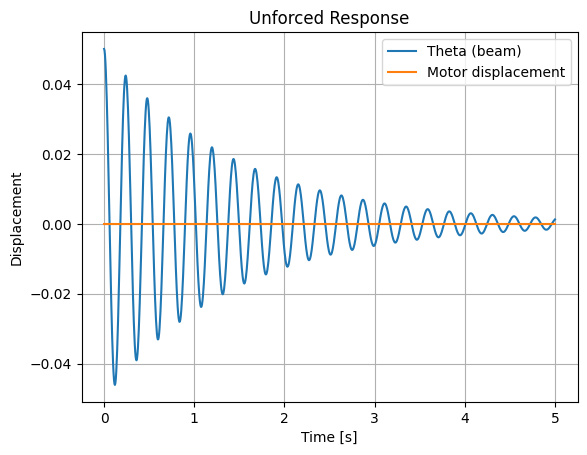

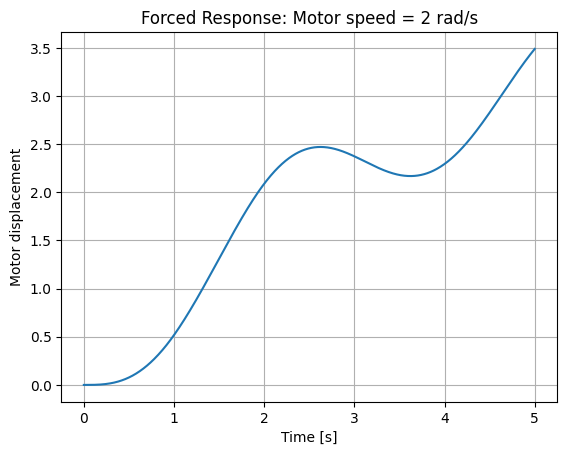

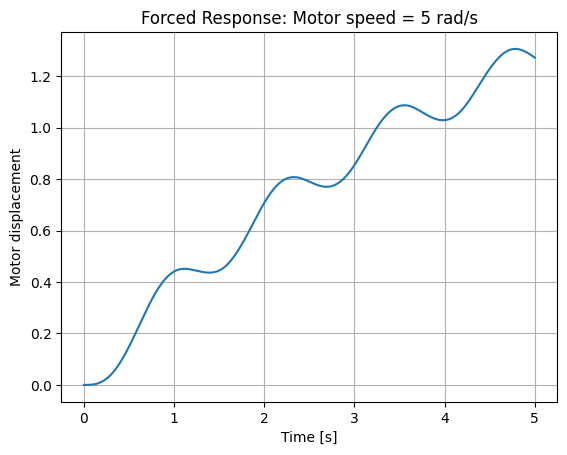

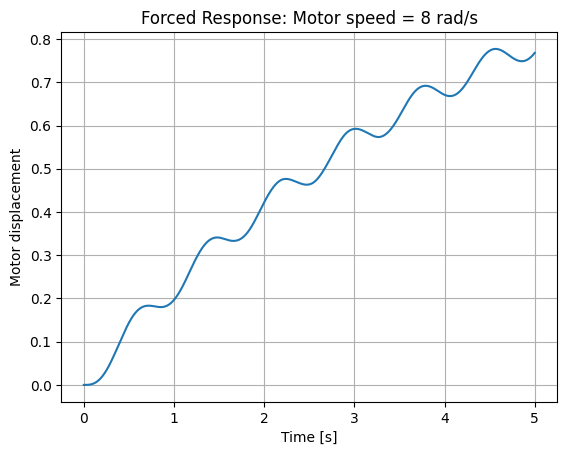

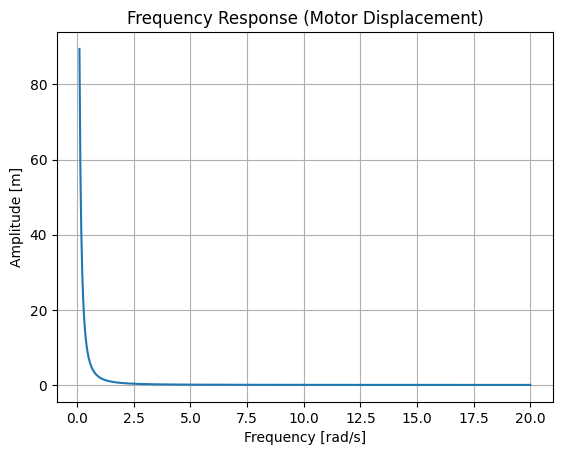

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.integrate import solve_ivp

# -------------------------------
# 1. Define system parameters
# -------------------------------
L = 1.0           # beam length (m)
m_b = 2.0         # beam mass (kg)
I_b = 0.1         # beam inertia (kg.m^2)
m_m = 0.5         # motor mass (kg)
k = 500.0         # spring stiffness (N/m)
c_theta = 1.0     # rotational damping
c_y = 0.1         # translational damping
theta0 = 0.05     # initial rotation (rad)

# Mass matrix
M = np.array([[I_b + m_b*(L/2)**2 + m_m*(L/2)**2, m_m*L/2],
              [m_m*L/2, m_m]])

# Stiffness matrix
K = np.array([[k*L**2, 0],
              [0, 0]])

# Damping matrix
C = np.array([[c_theta, 0],
              [0, c_y]])

# -------------------------------
# 2. Unforced response
# -------------------------------
def unforced(t, q):
    theta, y, theta_dot, y_dot = q
    dqdt = [theta_dot,
            y_dot,
            (-K[0,0]*theta - K[0,1]*y - C[0,0]*theta_dot - C[0,1]*y_dot)/M[0,0],
            (-K[1,0]*theta - K[1,1]*y - C[1,0]*theta_dot - C[1,1]*y_dot)/M[1,1]]
    return dqdt

q0 = [theta0, 0, 0, 0]
t_span = (0, 5)
t_eval = np.linspace(0, 5, 1000)
sol = solve_ivp(unforced, t_span, q0, t_eval=t_eval)

plt.figure()
plt.plot(sol.t, sol.y[0], label='Theta (beam)')
plt.plot(sol.t, sol.y[1], label='Motor displacement')
plt.title('Unforced Response')
plt.xlabel('Time [s]')
plt.ylabel('Displacement')
plt.legend()
plt.grid(True)

# -------------------------------
# 3. Forced response
# -------------------------------
# Example three motor speeds
omega_vals = [2, 5, 8]  # rad/s (example values)
F_amp = 1.0              # amplitude of forcing (N)

for omega in omega_vals:
    def forced(t, q):
        theta, y, theta_dot, y_dot = q
        F = F_amp * np.sin(omega * t)
        dqdt = [theta_dot,
                y_dot,
                (-K[0,0]*theta - C[0,0]*theta_dot)/M[0,0],
                (-K[1,1]*y - C[1,1]*y_dot + F)/M[1,1]]
        return dqdt

    sol = solve_ivp(forced, t_span, [0,0,0,0], t_eval=t_eval)
    plt.figure()
    plt.plot(sol.t, sol.y[1])
    plt.title(f'Forced Response: Motor speed = {omega} rad/s')
    plt.xlabel('Time [s]')
    plt.ylabel('Motor displacement')
    plt.grid(True)

# -------------------------------
# 4. Frequency response
# -------------------------------
freqs = np.linspace(0.1, 20, 500)
H = []

for omega in freqs:
    # Solve (K - omega^2*M + j*omega*C) q = F
    A = -omega**2 * M + 1j*omega*C + K
    F = np.array([0, F_amp])
    q = np.linalg.solve(A, F)
    H.append(abs(q[1]))  # motor displacement amplitude

plt.figure()
plt.plot(freqs, H)
plt.title('Frequency Response (Motor Displacement)')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude [m]')
plt.grid(True)
plt.show()


# **Week #2**

### **Activity #4**


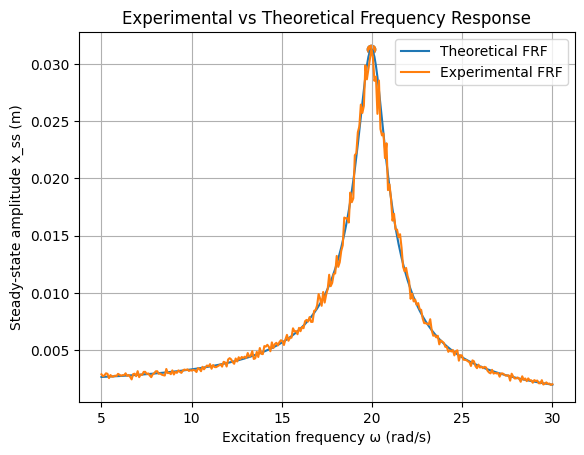

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example system parameters
m = 1.0          # equivalent mass (kg)
k = 400.0        # equivalent stiffness (N/m)
zeta = 0.04      # damping ratio
F0 = 1.0         # force amplitude (N)

# Natural frequencies
omega_n = np.sqrt(k/m)
omega_d = omega_n * np.sqrt(1 - zeta**2)

# Frequency range
omega = np.linspace(5, 30, 300)

# Theoretical frequency response
x_theory = (F0/m) / np.sqrt((omega_n**2 - omega**2)**2 +
                            (2*zeta*omega_n*omega)**2)

# Simulated experimental data
np.random.seed(0)
x_exp = x_theory * (1 + 0.05*np.random.randn(len(x_theory)))

# Find resonance values
idx_exp = np.argmax(x_exp)
omega_d_exp = omega[idx_exp]
x_ss_max_exp = x_exp[idx_exp]

idx_th = np.argmax(x_theory)
omega_d_th = omega[idx_th]
x_ss_max_th = x_theory[idx_th]

# Plot comparison
plt.figure()
plt.plot(omega, x_theory, label="Theoretical FRF")
plt.plot(omega, x_exp, label="Experimental FRF")
plt.scatter([omega_d_exp], [x_ss_max_exp])
plt.scatter([omega_d_th], [x_ss_max_th])
plt.xlabel("Excitation frequency ω (rad/s)")
plt.ylabel("Steady-state amplitude x_ss (m)")
plt.title("Experimental vs Theoretical Frequency Response")
plt.legend()
plt.grid(True)
plt.show()


# **Week #3**

**Activity #5**



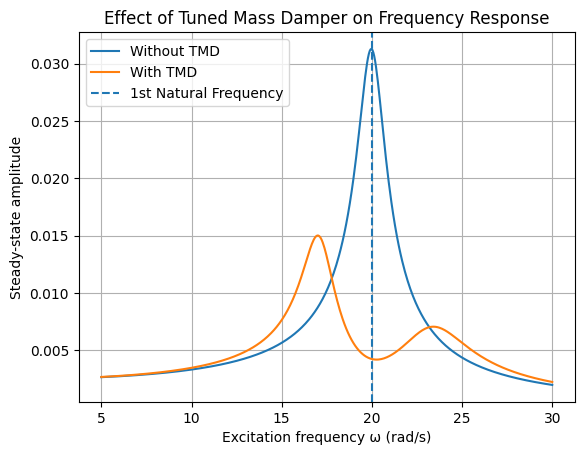

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Primary system parameters
m1 = 1.0
k1 = 400.0
zeta1 = 0.04
c1 = 2*zeta1*np.sqrt(k1*m1)
omega_n1 = np.sqrt(k1/m1)

# Tuned mass damper design
mu = 0.1
m2 = mu * m1
k2 = m2 * omega_n1**2
zeta2 = 0.1
c2 = 2*zeta2*np.sqrt(k2*m2)

# Frequency range
omega = np.linspace(5, 30, 500)
F0 = 1.0

# Frequency response without TMD
H_no = []
for w in omega:
    H_no.append(F0 / np.sqrt((k1 - m1*w**2)**2 + (c1*w)**2))

# Frequency response with TMD
H_tmd = []
for w in omega:
    M = np.array([[m1, 0],
                  [0, m2]])
    C = np.array([[c1 + c2, -c2],
                  [-c2, c2]])
    K = np.array([[k1 + k2, -k2],
                  [-k2, k2]])
    A = -w**2*M + 1j*w*C + K
    F = np.array([F0, 0])
    q = np.linalg.solve(A, F)
    H_tmd.append(abs(q[0]))

# Plot
plt.figure()
plt.plot(omega, H_no, label="Without TMD")
plt.plot(omega, H_tmd, label="With TMD")
plt.axvline(omega_n1, linestyle='--', label="1st Natural Frequency")
plt.xlabel("Excitation frequency ω (rad/s)")
plt.ylabel("Steady-state amplitude")
plt.title("Effect of Tuned Mass Damper on Frequency Response")
plt.legend()
plt.grid(True)
plt.show()


# **Week #4**

**Activity #6**



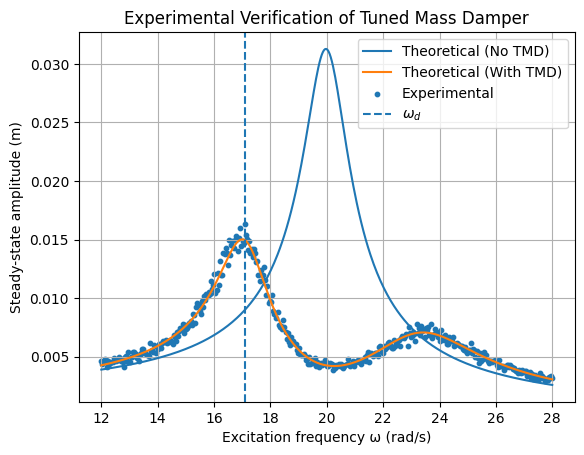

(np.float64(17.092731829573935), np.float64(0.016324731718384097))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
m1 = 1.0
k1 = 400.0
zeta1 = 0.04
c1 = 2*zeta1*np.sqrt(k1*m1)
omega_n1 = np.sqrt(k1/m1)

# Tuned mass damper parameters
mu = 0.1
m2 = mu*m1
k2 = m2*omega_n1**2
zeta2 = 0.1
c2 = 2*zeta2*np.sqrt(k2*m2)

# Frequency range near resonance
omega = np.linspace(12, 28, 400)
F0 = 1.0

# Theoretical response without TMD
H_no = []
for w in omega:
    H_no.append(F0 / np.sqrt((k1 - m1*w**2)**2 + (c1*w)**2))

# Theoretical response with TMD
H_tmd = []
for w in omega:
    M = np.array([[m1, 0],
                  [0, m2]])
    C = np.array([[c1 + c2, -c2],
                  [-c2, c2]])
    K = np.array([[k1 + k2, -k2],
                  [-k2, k2]])
    A = -w**2*M + 1j*w*C + K
    F = np.array([F0, 0])
    q = np.linalg.solve(A, F)
    H_tmd.append(abs(q[0]))

# Simulated experimental data (realistic noise added)
np.random.seed(0)
H_exp = np.array(H_tmd) * (1 + 0.05*np.random.randn(len(H_tmd)))

# Find experimental resonance
idx_max = np.argmax(H_exp)
omega_d = omega[idx_max]
x_ss_max = H_exp[idx_max]

# Plot
plt.figure()
plt.plot(omega, H_no, label="Theoretical (No TMD)")
plt.plot(omega, H_tmd, label="Theoretical (With TMD)")
plt.scatter(omega, H_exp, s=10, label="Experimental")
plt.axvline(omega_d, linestyle="--", label=r"$\omega_d$")
plt.xlabel("Excitation frequency ω (rad/s)")
plt.ylabel("Steady-state amplitude (m)")
plt.title("Experimental Verification of Tuned Mass Damper")
plt.legend()
plt.grid(True)
plt.show()

omega_d, x_ss_max


# REATTEMPT



## **Week 1**

## Activity 1

Derive the 2-dof freedom model that will capture the first two dominant modes of small amplitude vibration of the system.

Let the beam have:

*   Length L, bending stiffness EI, mass per unit length ρA
*   Left end pinned at x=0
*   Right end at x=L connected to a vertical spring of stiffness $k_s$ to the frame
*   Unbalanced motor attached at x=a (given “middle,” so typically a=L/2) with lumped mass m
*   The unbalance provides a vertical harmonic force at x=a:
<center>$F(t) = F_0 \sin(\omega t)$ </center>
<center>$F_0 = m u_e \omega^2$ </center>

(This is the forcing, not an additional DOF.)

We model small transverse vibration w(x,t) in one plane.


Approximate the beam deflection by a two-term expansion:
<center>$w(x,t) = \phi_1(x)q_1(t) + \phi_2(x)q_2(t)$</center>

Here:

*   $\phi_1(x), \phi_2(x)$ are chosen “shape functions”
*   $q_1(t), q_2(t)$ are the two DOFs (generalized coordinates)

A common, simple choice that satisfies the essential pinned displacement condition w(0,t)=0 is:

<center>$\phi_1(x) = \sin\left(\frac{\pi x}{L}\right), \quad \phi_2(x) = \sin\left(\frac{2\pi x}{L}\right)$</center>

These work well for a 2-mode approximation in labs, and the spring at x=L will be handled through the spring energy term (below).

Beam kinetic energy:

<center>$T_b = \frac{1}{2} \int_0^L \rho A \dot{w}^2 dx$</center>

Motor lumped mass kinetic energy at x=a:
<center>$T_m = \frac{1}{2} m_m \dot{w}(a,t)^2$</center>

Total:
<center>$T = T_b + T_m$</center>

\
Substitute  
 <center>$w(x,t) = \sum \phi_i q_i, \quad \dot{w} = \sum \phi_i \dot{q}_i$</center>


<center> $T = \frac{1}{2} \sum_{i=1}^{2} \sum_{j=1}^{2} \dot{q}_i \dot{q}_j \left[ \int_0^L \rho A \phi_i \phi_j \,dx + m_m \phi_i(a) \phi_j(a) \right]
$</center>

\
So the mass matrix entries are:

<center> $M_{ij}=\int_0^L \rho A \phi_i \phi_j \, dx + m_m \phi_i(a) \phi_j(a)$</center>

Beam bending strain energy:

<center> $V_b = \frac{1}{2} \int_0^L EI (w'')^2 dx
$</center>

Spring potential energy at the right end:
<center>$V_s = \frac{1}{2} k_s w(L,t)^2
$</center>

Total:
<center>$V = V_b + V_s
$</center>

Substitute
<center>$w = \sum \phi_i q_i , \quad w'' = \sum \phi_i'' q_i
$</center>


<center>$V = \frac{1}{2} \sum_{i=1}^{2} \sum_{j=1}^{2} q_i q_j \left[ \int_0^L EI \phi_i'' \phi_j'' \,dx + k_s \phi_i(L) \phi_j(L) \right]
$</center>

So the stiffness matrix entries are:

<center>$K_{ij} = \int_0^L EI \phi_i'' \phi_j'' \,dx + k_s \phi_i(L) \phi_j(L)
$</center>
	​

Force applied at x=a: F(t) (vertical)

Using virtual work / modal projection, generalized force:

<center>$Q_i(t) = F(t) \phi_i(a)
$</center>

So the forcing vector is:
<center>$Q(t) = F_0 \sin(\omega t) \begin{bmatrix} \phi_1(a) \\ \phi_2(a) \end{bmatrix}
$</center>

Using Lagrange’s equations:
<center>$M \ddot{q} + K q = Q(t)
$</center>

where <center>$q = \begin{bmatrix} q_1 \\ q_2 \end{bmatrix}$</center>
